# Deep Learning with Python

Welcome to the **Deep Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in deep learning. You will explore:

- Artificial Neural Networks and Gradient Descent
- Convolutional Neural Networks (CNNs) for Computer Vision
- Recurrent Neural Networks (RNNs) for Text Prediction
- Diffusion Transformers for Image Generation

Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing deep learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---

## Part 2 - Convolutional Neural Networks

In this project, you will leanr how to handle more complex datasets and how to create a CNN model to make predictions on image datasets.  
Many Python packages can be used to work with Deep Learning (Scikit-learn, Tensorflow, Keras...). In this project, we will used **PyTorch**, as it is the most popular at the moment.    
`https://pytorch.org/`


This project tis organised as follow:

### 1. Data Management
**1.1 Data Downloading**
- **Objective**: Acquire the dataset required for training and evaluation.
- **Steps**:
  - Identify a suitable dataset (e.g., CIFAR-10, ImageNet, or a custom dataset).
  - Download the dataset and organize it into appropriate directories for easy access.

**1.2 Train/Validation/Test Split**

- **Objective**: Divide the dataset into training, validation, and test sets to ensure unbiased evaluation.
- **Steps**:
  - Allocate a percentage of the data for training (e.g., 70%), validation (e.g., 15%), and testing (e.g., 15%).
  - Ensure that each set is representative of the overall dataset.

**1.3 Shuffling**

- **Objective**: Randomize the order of data samples to prevent any inherent ordering biases.
- **Steps**:
  - Implement shuffling during data loading to ensure that the model does not learn any unintended patterns.

**1.4 Creation of Data Loader**

- **Objective**: Efficiently load data in batches for training and evaluation.
- **Steps**:
  - Utilize data loader utilities provided by deep learning frameworks to handle batching, shuffling, and augmentation.

### 2. Model Creation

**2.1 CNN from Scratch**

- **Objective**: Build a custom CNN architecture tailored to the specific dataset.
- **Steps**:
  - Define the architecture with appropriate layers (e.g., convolutional, pooling, fully connected).
  - Choose activation functions, loss functions, and optimizers.
  - Compile and summarize the model to review its structure.

**2.2 CNN from Foundation Model and Fine-Tuning**

- **Objective**: Leverage pre-trained models to improve performance and reduce training time.
- **Steps**:
  - Select a pre-trained model (e.g., VGG16, ResNet50) relevant to the task.
  - Replace the final layers to match the number of classes in the dataset.
  - Freeze initial layers to retain learned features and fine-tune subsequent layers on the new dataset.

### 3. Results

**3.1 Plotting Training Curve**

- **Objective**: Visualize the model's performance over epochs.
- **Steps**:
  - Plot training and validation accuracy to assess learning progress.
  - Plot training and validation loss to identify potential overfitting or underfitting.

**3.2 Visualize Images and Predictions**

- **Objective**: Evaluate the model's predictions on sample images.
- **Steps**:
  - Display a set of test images alongside their predicted and true labels.
  - Highlight correctly classified and misclassified examples to gain insights into model performance.
  
---

## Dataset

In this exercise, we will use the **CIFAR-10 dataset**.  

The CIFAR (Canadian Institute For Advanced Research) datasets are a collection of images widely used for training machine learning and computer vision algorithms. There are two primary versions:

### CIFAR-10

- Description: Consists of 60,000 color images, each of size 32x32 pixels, categorized into 10 distinct classes.
- Classes: Airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.  

This dataset is commonly used for benchmarking image classification algorithms.
### CIFAR-100

- Description: Similar to CIFAR-10, it is comprised of 100 classes, with 600 images per class.
- Classes: Each class contains 500 training images and 100 testing images.  

The increased number of classes in CIFAR-100 provides a more challenging classification task compared to CIFAR-10.


You can find more details here:
`https://www.cs.toronto.edu/~kriz/cifar.html`

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np


# Data Downloading

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((112,112)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5),)])
cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Train / Validation / Split

When training a model, it is usual to divide the whole dataset into three distinct subdatasets: training, validation and test sets.
- **Training set**: Portion of the data used to train the model during the *training phase*. During this phase, the model learns the patterns of the data by adjusting its parameters
- **Validation set**: Portion of the data used to verify the training process during the *training phase*. The performance of the validation set relative to the test set can help prevent overfitting.  The model's parameters are not updated while going through the validation set.
- **Test set**: Portion of the data used as final validation for the model performance. It assesses the model performance on unseen data. It is the closest evaluation of the model on *production data*.

In [3]:

# Train/Validation/Test split
train_size = int(0.8 * len(cifar10_train))
val_size = len(cifar10_train) - train_size
train_subset, val_subset = torch.utils.data.random_split(cifar10_train, [train_size, val_size])

# 1.5 Creation of Data Loader
batch_size = 8
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True,)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)




### Plot images

Now that you have your three data loader containing your images and classes, you can try to plot the images to understand how to interact with the dataloader. Don't hesitate to modify the parameters to understand what they do.  

Answer the following questions:
- What is the purpose of the *train_size* variable? What should be (approximately) its range?
- What is the use of the *shuffle* parameter? Why is it set to *True* for the train data loader, and not the others?
- What is the use of *batch_size*?


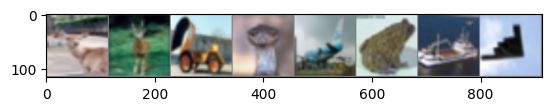

deer  deer  truck bird  plane frog  ship  plane


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get a batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Create CNN model

<img src="../docs/cnn.jpg" alt="Perceptron" width="500"/> 

As seen during the course, a CNN is composed of three distincts section:
- A convolution encoder that extracts the features. It is composed of:
    - Convolutional layers
    - Pooling layers
- A flattening layer to link the convolutional section with the fully connected section
- A fully connected decoder that makes predictions out of the encoded features.  

By using PyTorch, you will have to recreate each of these layers and sepcify their connections with each others.

- Complete the *CNN* class below to create a CNN model.
- Define the architecture of the neural network in the *__init__* method
  - Convolutional layer: nn.Conv2d(n_channels_input, n_channels_output, kernel_size, padding, stride)
  - Max pool layer: nn.Maxpool2d(kernel_size, stride, padding)
  - Flatten layer: nn.Flatten()
  - fully connected layer: nn.Linear(n_input, n_output)
- Define the connections between layers in the *forward* method
  - Don't forget to add the activation functions
    - ReLU: F.relu()
    - Sigmoid: F.sigmoid()



In [5]:
# Add GPU support
# See https://pytorch.org/ for more info
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)

False
cpu


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1) 
        self.pool = nn.MaxPool2d(2, 2) 

        self.fc1 = nn.Linear(64 * 14 * 14, 512) 
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 10) 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 14 * 14)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) 

        return x

model = CNN().to(device)

print(model)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


### Set the training loop

Now that you have the dataset and the model, you have to perform the training. It includes make predictions with the forward pass, calculating the loss between predictions and ground truths, and performing the parameters update with backpropagation.

In PyTorch, you have to perform each steps explicitly in a *fit* function.
In the code below, the fit function is completed for the training set. The steps are:
- Extract batches from the data loader
- Get predictions from batch
- Calculate loss and gradients
- Perform backpropagation
- Repeat for all datasets and all epochs.

**Your work:**
- Complete the *fit* function to incorporate the validation set:
- For each epoch:
    - Get predictions on the validation set
    - Calculate loss
    - Store validation loss
- No backpropagation is performed on the validation set
    - Use `with torch.no_grad():` to avoid computing the gradients

In [9]:
import torch.optim as optim

# Criterion -> Loss function. Here we use the Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Optimizer -> Optimisation used to update the parameters. Here we use Stochastic Gradient Descent
learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Number of epochs to perform the backpropagation on the whole train_set
n_epochs = 5

def fit(model, train_set, validation_set, n_epochs, criterion, optimizer):
    train_loss = np.zeros(n_epochs)
    val_loss = 0 #TODO
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_set, 0):

            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward() # Compute the gradients for all the parameters of the model using chain rule calculus
            optimizer.step() # Perform the parameter update (param' = param - lr*gradient)

            # print statistics
            running_loss += loss.item()
            train_loss[epoch] += loss.item()
            if i % 1000 == 999:    # print every X mini-batches
                print(f'[{epoch + 1}/{n_epochs} epochs, {i + 1:5d}/{len(train_set)} samples] -> loss: {running_loss / 1000:.3f}')
                running_loss = 0.0
        train_loss[epoch] = train_loss[epoch] / len(train_set)

        with torch.no_grad():
            pass

            # TODO: Get validation set loss through each epoch.
        
    print('Finished Training')
    return model, train_loss, val_loss

model, train_loss, val_loss = fit(model,train_loader,val_loader,n_epochs,criterion,optimizer)

[1/5 epochs,  1000/5000 samples] -> loss: 2.302
[1/5 epochs,  2000/5000 samples] -> loss: 2.300
[1/5 epochs,  3000/5000 samples] -> loss: 2.298
[1/5 epochs,  4000/5000 samples] -> loss: 2.293
[1/5 epochs,  5000/5000 samples] -> loss: 2.285
[2/5 epochs,  1000/5000 samples] -> loss: 2.261
[2/5 epochs,  2000/5000 samples] -> loss: 2.182
[2/5 epochs,  3000/5000 samples] -> loss: 2.087
[2/5 epochs,  4000/5000 samples] -> loss: 1.997
[2/5 epochs,  5000/5000 samples] -> loss: 1.913
[3/5 epochs,  1000/5000 samples] -> loss: 1.876
[3/5 epochs,  2000/5000 samples] -> loss: 1.846
[3/5 epochs,  3000/5000 samples] -> loss: 1.789
[3/5 epochs,  4000/5000 samples] -> loss: 1.775
[3/5 epochs,  5000/5000 samples] -> loss: 1.724
[4/5 epochs,  1000/5000 samples] -> loss: 1.676
[4/5 epochs,  2000/5000 samples] -> loss: 1.646
[4/5 epochs,  3000/5000 samples] -> loss: 1.629
[4/5 epochs,  4000/5000 samples] -> loss: 1.601
[4/5 epochs,  5000/5000 samples] -> loss: 1.587
[5/5 epochs,  1000/5000 samples] -> loss

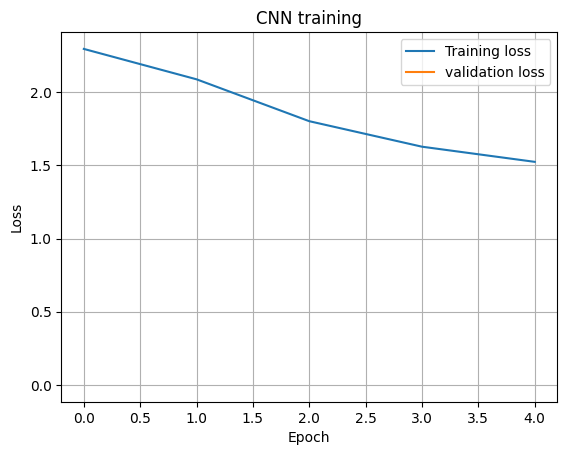

In [10]:
def plot_losses(train_loss, val_loss):
    plt.plot(train_loss, label='Training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.title("CNN training")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_losses(train_loss, val_loss)

### Make prediction

Now that you have trained your model, you can verify its performance on the field.  
To do so, you can use the **test set**. You can compute the accuracy performance for the whole set, which will give a good representation of the model capability in a production environment.  
For now, just printing the prediction for a few images will be enough.  
The model outputs class probabilities in the format of a **one hot encoded vector**. In order to get the prediction of the model, you have to extract the maximum probability.  

- *Complete the predict function below to return the class predicted by the model in the form of a string*
- Remember the *classes* variable at the start of the notebook.

In [ ]:
def predict(model, images, classes):
    one_hot_encoded_outputs = model(images).detach().numpy()
    
    # TODO

    pass
    


# get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Make the prediction
prediction = predict(model,images,classes)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("LABEL / PREDICTION")
print(''.join(f'{classes[labels[j]]:5s} / {prediction[j]:5s}\n' for j in range(batch_size)))

###  BONUS - Foundation models

In the previous sections, you learned how to train your own custom architecture from scratch.  
All the weights were randomly initialised, and the model started its training with no apriori of the dataset.  

During the course, we saw multiple architectures (AlexNet, VGG, ResNet...). These models were trained on large databases, and can be **fine-tuned** for your specific needs. These large-scale neural networks, pre-trained on extensive datasets are called **fundation models**.  

In computer vision, you typically recover the pre-trained convolutional layers of the foundation model and then adapt the fully connected layers to your specific needs.  

Below is an example of the AlexNet model. After downloading the model from PyTorch, we can display the model's different layers by simply calling it in Python.   

What can you tell from the output of the code below?    
See how you can select only a subpart of the model?

In [ ]:
# Example of an AlexNet architecture

import torchvision.models as models

tmp_model = models.alexnet(weights="IMAGENET1K_V1")
print(tmp_model)
#print(tmp_model.features)
#print(tmp_model.avgpool)
#print(tmp_model.classifier)

Let's try with our CIFAR-10 example

**Your job:**

- Complete the **FoundationNet** class below to incorporate the foundation model of your choice
- Check the PyTorch models page and select a model that suits your application `https://pytorch.org/vision/main/models.html`
- Load a pre-trained model
- Remove the fully connected layers
    - This step depends on the function model you choose. Don't hesitate to check online for your specific approach
    - Use the knowledge of the model architecture to switch the detection head
- Add your own fully connected architecture that fits your use case
- Initialise your model with the FundationNet class
- Train/Test your new model
- Compare the results with the moel trained from scratch

In [ ]:
import torchvision.models as models

class FoundationNet(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO


    def forward(self, x):

        # TODO
        
        pass

foundation_model = FoundationNet().to(device)

In [ ]:
# Evaluation of the fundation model

criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = optim.SGD(foundation_model.parameters(), lr=learning_rate)
n_epochs = 5

foundation_model, train_loss, val_loss = fit(foundation_model,train_loader,val_loader,n_epochs,criterion,optimizer)
plot_losses(train_loss, val_loss)

# get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Make the prediction
prediction = predict(foundation_model,images,classes)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("LABEL / PREDICTION")
print(''.join(f'{classes[labels[j]]:5s} / {prediction[j]:5s}\n' for j in range(batch_size)))